In [1]:

import numpy as np
from PIL import Image
import os
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import glob
import matplotlib.pyplot as plt
import pandas as pd
import cv2

/home/lakshita/somusan/hubmap_kaggle/.venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!mkdir -p /home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/images
!mkdir -p /home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks
!mkdir -p /home/lakshita/somusan/hubmap_kaggle/hubmap_data/temp1


def tile_image(p_img, folder, size: int = 768) -> list:
    w = h = size
    im = np.array(Image.open(p_img))
    # https://stackoverflow.com/a/47581978/4521646
    tiles = [im[i:(i + h), j:(j + w), ...] for i in range(0, im.shape[0], h) for j in range(0, im.shape[1], w)]
    idxs = [(i, (i + h), j, (j + w)) for i in range(0, im.shape[0], h) for j in range(0, im.shape[1], w)]
    name, _ = os.path.splitext(os.path.basename(p_img))
    files = []
    for k, tile in enumerate(tiles):
        if tile.shape[:2] != (h, w):
            tile_ = tile
            tile = np.zeros_like(tiles[0])
            tile[:tile_.shape[0], :tile_.shape[1], ...] = tile_
        p_img = os.path.join(folder, f"{name}_{k:02}.png")
        Image.fromarray(tile).save(p_img)
        files.append(p_img)
    return files, idxs

tiles_img, idxs = tile_image("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/hubmap-organ-segmentation/train_images/62.tiff", "/home/lakshita/somusan/hubmap_kaggle/hubmap_data/temp1", size=1024)
# tiles_seg, idxs = tile_image("../input/hacking-the-human-body-annotation-masks/train_binary_masks/12233.png", "/kaggle/temp/masks", size=1024)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.unique(plt.imread("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/temp1/62_02.png"))

array([0.        , 0.13333334, 0.14117648, 0.14509805, 0.15686275,
       0.16470589, 0.16862746, 0.17254902, 0.1764706 , 0.18039216,
       0.18431373, 0.1882353 , 0.19215687, 0.19607843, 0.2       ,
       0.20392157, 0.20784314, 0.21176471, 0.21568628, 0.21960784,
       0.22352941, 0.22745098, 0.23137255, 0.23529412, 0.23921569,
       0.24313726, 0.24705882, 0.2509804 , 0.25490198, 0.25882354,
       0.2627451 , 0.26666668, 0.27058825, 0.27450982, 0.2784314 ,
       0.28235295, 0.28627452, 0.2901961 , 0.29411766, 0.29803923,
       0.3019608 , 0.30588236, 0.30980393, 0.3137255 , 0.31764707,
       0.32156864, 0.3254902 , 0.32941177, 0.33333334, 0.3372549 ,
       0.34117648, 0.34509805, 0.34901962, 0.3529412 , 0.35686275,
       0.36078432, 0.3647059 , 0.36862746, 0.37254903, 0.3764706 ,
       0.38039216, 0.38431373, 0.3882353 , 0.39215687, 0.39607844,
       0.4       , 0.40392157, 0.40784314, 0.4117647 , 0.41568628,
       0.41960785, 0.42352942, 0.42745098, 0.43137255, 0.43529

In [3]:

TILE_SIZE = 1024
DATASET_FOLDER = "/home/lakshita/somusan/hubmap_kaggle/hubmap_data/hubmap-organ-segmentation"
ANNOT_DATASET = "/home/lakshita/somusan/hubmap_kaggle/hubmap_data/mask_png"


for dir_source, dir_target in [
    (os.path.join(DATASET_FOLDER, 'train_images'), "/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/images"),
    (os.path.join(ANNOT_DATASET, 'train_binary_masks'), "/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks"),
]:
    ls = glob.glob(os.path.join(dir_source, '*'))
    _= Parallel(n_jobs=3)(
        delayed(tile_image)(p_img, dir_target, size=TILE_SIZE) for p_img in tqdm(ls)
    )

 92%|█████████▏| 324/351 [06:20<00:30,  1.12s/it]/home/lakshita/somusan/hubmap_kaggle/.venv/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
100%|██████████| 351/351 [00:22<00:00, 15.41it/s]


### Rough work [caution]:

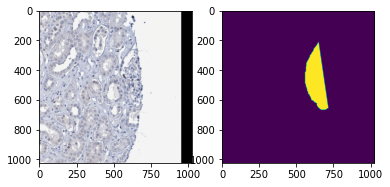

In [4]:
plt.subplot(1,2,1)
plt.imshow(plt.imread("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/images/62_05.png"))


plt.subplot(1,2,2)
plt.imshow(plt.imread("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/62_05.png"))

In [26]:
np.unique(plt.imread("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10274_06.png")) #0.00392157 

array([0.        , 0.00392157], dtype=float32)

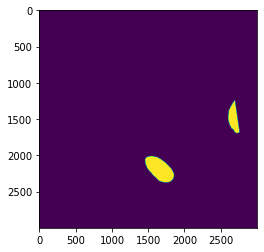

In [15]:
plt.imshow(plt.imread("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/mask_png/train_mclass_masks/62.png"))

In [24]:
!ls /home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610*

/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_00.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_01.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_02.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_03.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_04.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_05.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_06.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_07.png
/home/lakshita/somusan/hubmap_kaggle/hubmap_data/tiled_data/binary_masks/10610_08.png


In [15]:
def rle_decode(mask_rle, shape, color=1):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.float32)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
    return img.reshape(shape).T

In [16]:
train_df = pd.read_csv("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/hubmap-organ-segmentation/train.csv")
# train_df[train_df["id"]==62].index[0]
train_df.head()

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female


In [17]:
rle_img =rle_decode(train_df["rle"].iloc[302],(train_df["img_height"].iloc[302],train_df["img_width"].iloc[302]))
# plt.imshow(rle_img)
rle_img.shape

(3000, 3000)

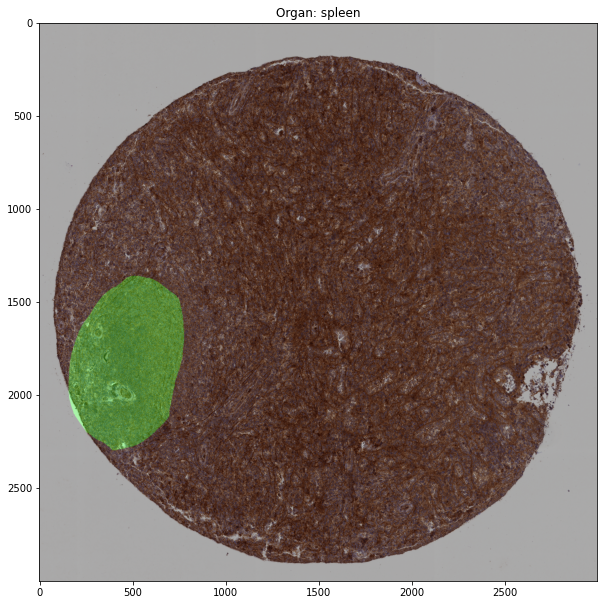

In [23]:
def mask_overlay(id_):
    img_ = plt.imread("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/hubmap-organ-segmentation/train_images/"+str(id_)+".tiff")
    train_df = pd.read_csv("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/hubmap-organ-segmentation/train.csv")
    idx = train_df[train_df["id"]==id_].index[0]
    rle_img =rle_decode(train_df["rle"].iloc[idx],(train_df["img_height"].iloc[idx],train_df["img_width"].iloc[idx]))

    mask = rle_img
    mask = mask.reshape(mask.shape[0],mask.shape[1],1)
    zero_mask = np.zeros((3000,3000,3))
    zero_mask[:,:,0] = mask[:,:,0]
    zero_mask[:,:,1] = mask[:,:,0]
    zero_mask[:,:,2] = mask[:,:,0]

    zero_mask[:,:,0] = zero_mask[:,:,0] * 0
    zero_mask[:,:,1] = zero_mask[:,:,1] * 255 
    zero_mask[:,:,2] = zero_mask[:,:,2] * 0 

    zero_mask = zero_mask.astype(np.uint8)

    combo = cv2.addWeighted(img_, 0.7, zero_mask, 0.3, 0.0)
    
    plt.figure(figsize=(10,14))
    plt.title(f'Organ: {train_df["organ"].iloc[idx]}')
    plt.imshow(combo)
    plt.show()

mask_overlay(10610)

In [48]:
# train_df[train_df["organ"]=="lung"]

In [49]:
mc_mask_ = plt.imread("/home/lakshita/somusan/hubmap_kaggle/hubmap_data/mask_png/train_mclass_masks/13189.png")
np.unique(mc_mask_)

array([0.        , 0.01176471], dtype=float32)

In [46]:
# 0.        , 0.01960784 [largeintestine]

4.9999992